In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
from matplotlib.animation import FuncAnimation

%matplotlib inline

sns.set(style="darkgrid")

In [26]:
N = 10
L = 1

delta_t = L / N

alpha = 0.5

web = np.zeros(N + 1)
x = np.linspace(0, L, num = N + 1)
g = (x[1]**(1-alpha) - x[0]**(1-alpha))
d = (x[2]**(1-alpha) - 2*x[1]**(1-alpha) + x[0]**(1-alpha)) 

In [27]:
f = lambda y, t : 2 * y**2 + (2*t**(2-alpha) / math.gamma(3 - alpha))
u0 = lambda t : t**2

In [28]:
web[0] = u0(x[0])
web[1] = (math.gamma(2 - alpha) * delta_t * f(x[1], web[0])) / (x[1]**(1-alpha) - x[0]**(1-alpha)) + web[0]

for n in range(1, N - 1):
    web[n + 1] = (math.gamma(2 - alpha) * delta_t * f(x[n], web[n])) / g
    s = 0
    for m in range(0, n - 1):
        if(m == 0):
            s += g * web[m]
        else:
            s += d * web[m]
        
    web[n + 1] += g**(0.5) * s

web[N] = web[N - 1] + (math.gamma(2 - alpha) * delta_t) / g * f(x[n], web[N - 1])

In [29]:
print()

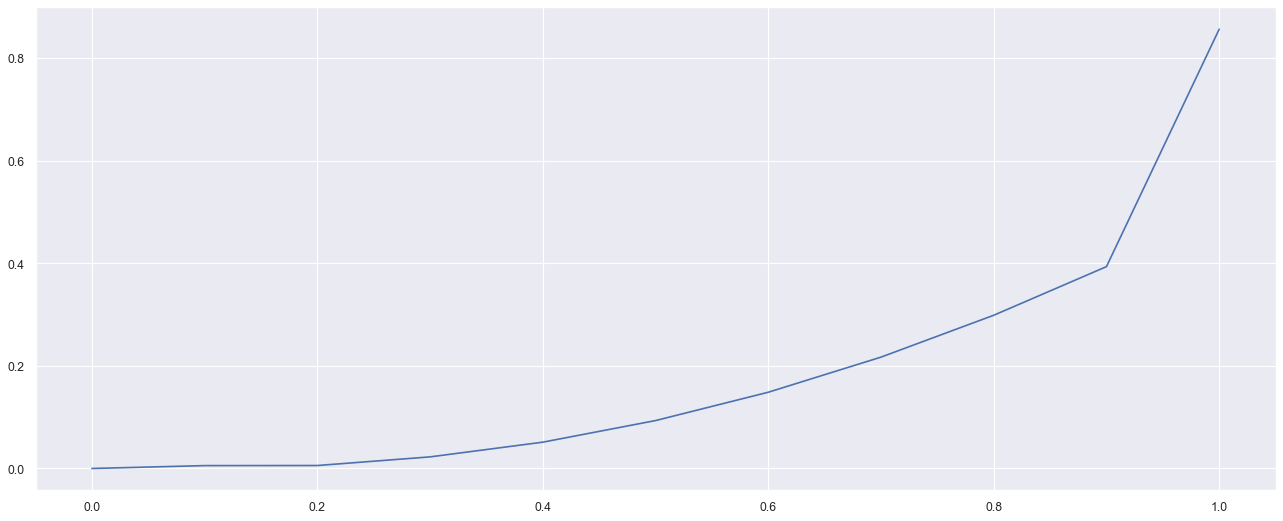

In [30]:
camera = Camera(plt.figure(figsize = (20,8), dpi = 80))
plt.plot(x, web)